# Income Bracket 2021

In [1]:
# Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
import json

In [2]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2021
)

In [3]:
# Run Census Search to retrieve data on all states (2016 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E"),
       # "B19301_001E",
       # "B01003_001E"),
    {'for': 'state:*'}
)

# Convert to DataFrame
Income_Bracket_2021 = pd.DataFrame(census_data)

# Column renaming
Income_Bracket_2021 = Income_Bracket_2021.rename(
    columns = {
        "B19013_001E": "Household Income",
#"B19301_001E":"Per Capita Income",
#"B01003_001E":"Population",     
        "NAME": "Name"
    }
)

# Combine two Income Brackets to one column column
#Income_Bracket_2016["Household Income 10,000 to 19,999"] = (Income_Bracket_2016["Household Income 10,000 to 14,999"] + Income_Bracket_2016["Household Income 15,000 to 19,999"]) / 2
#Income_Bracket_2016["Household Income 20,000 to 29,999"] = (Income_Bracket_2016["Household Income 20,000 to 24,999"] + Income_Bracket_2016["Household Income 25,000 to 29,999"]) / 2
#Income_Bracket_2016["Household Income 30,000 to 39,999"] = (Income_Bracket_2016["Household Income 30,000 to 34,999"] + Income_Bracket_2016["Household Income 35,000 to 39,999"]) / 2
#Income_Bracket_2016["Household Income 40,000 to 49,999"] = (Income_Bracket_2016["Household Income 40,000 to 44,999"] + Income_Bracket_2016["Household Income 45,000 to 49,999"]) / 2

# Configure the final DataFrame
#Income_Bracket_2016 = Income_Bracket_2016[
   # [
     #   "Name",
      #  "Household Income Total",
       # "Household Income Less than 10,000",
        #"Household Income 10,000 to 19,999",
        #"Household Income 20,000 to 29,999",
      #  "Household Income 30,000 to 39,999",
       # "Household Income 40,000 to 49,999",
       # "Household Income 50,000 to 59,999",
        #"Household Income 60,000 to 74,999",
       # "Household Income 75,000 to 99,999",
       # "Household Income 100,000 to 124,999",
       # "Household Income 125,000 to 149,999",
       # "Household Income 150,000 to 199,999",
        #"Household Income 200,000 or more"
    #]
#]

# Display DataFrame length and sample data
#print(f"Number of rows in the DataFrame: {len(Income_Bracket_2016)}")
Income_Bracket_2021

,Name,Household Income,state
0,Alabama,54943.0,01
1,Alaska,80287.0,02
2,Arizona,65913.0,04
3,Arkansas,52123.0,05
4,California,84097.0,06
5,Colorado,80184.0,08
6,Connecticut,83572.0,09
7,Delaware,72724.0,10
8,District of Columbia,93547.0,11
9,Florida,61777.0,12


In [4]:
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_bracket = Income_Bracket_2021[Income_Bracket_2021["Name"].isin(selected_states)]
selected_bracket

,Name,Household Income,state
4,California,84097.0,06
9,Florida,61777.0,12
13,Illinois,72563.0,17
32,New York,75157.0,36
43,Texas,67321.0,48


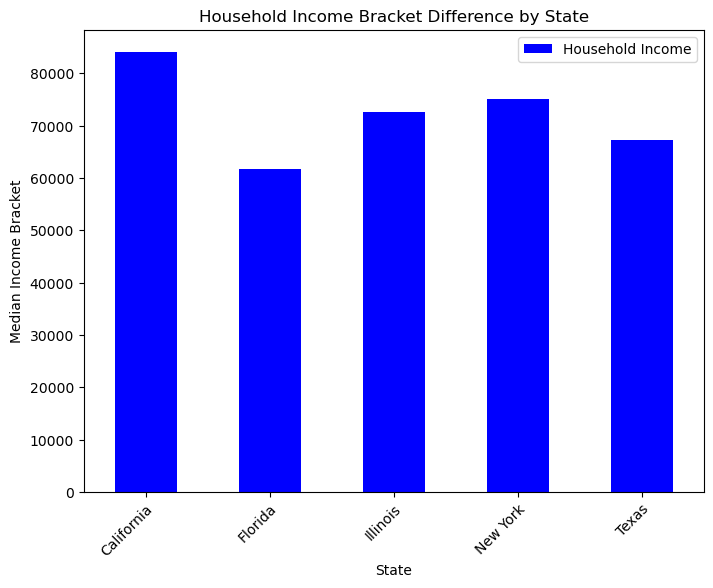

In [7]:
figure9 = selected_bracket.plot(kind="bar", color=["blue"], figsize=(8,6),
                           title="Household Income Bracket Difference by State",
                           xlabel="State",
                           ylabel="Median Income Bracket")

figure9.set_xticklabels(selected_bracket['Name'], rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.savefig("output_data/Fig9.png")
plt.show()

In [8]:

Income_Bracket_2021.to_csv("output_data/Income Bracket 2021 Median Household.csv")